In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('FinalData1.csv')
data.head()

C:\Users\Satyapriya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UserId,Status,Uninstall,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,...,Travel proportion,Unknown proportion,Variety proportion,Variety Show proportion,Wrestling proportion,UNKNOWN Genreproportion,Channelsproportion,Moviesproportion,TV Showsproportion,UNKNOWN Typeproportion
0,d168e2b924124feaad13eae44a68fce9,Completed,0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.000961,0.000959,255.0
1,deed7490952a6746610ee2ee9fd219b7,Completed,1,2.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.001921,255.000000,255.0
2,13d9f55e297d7d9c219fbe9085e1006c,Completed,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.000000,0.007674,255.0
3,fccc2c0abf5afabf242a70df7b4c9e69,Completed,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.000000,0.001918,255.0
4,93b755f457a9d3e14a06ebd843583560,Not Completed,1,8.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.007685,255.000000,255.0


In [3]:
print(data.columns)
data['Status'] = data['Status'].map({'Completed': 1, 'Not Completed': 0})

Index(['UserId', 'Status', 'Uninstall', ' Action ', ' Adventure ',
       ' Animation ', ' Anime ', ' Athletics ', ' Automotive ', ' Award Show ',
       ...
       ' Travel proportion', ' Unknown proportion', ' Variety proportion',
       ' Variety Show proportion', ' Wrestling proportion',
       'UNKNOWN Genreproportion', 'Channelsproportion', 'Moviesproportion',
       'TV Showsproportion', 'UNKNOWN Typeproportion'],
      dtype='object', length=145)


In [4]:
data['Status'] = data['Status'].fillna(255)
data['Status'].unique()

array([  1.,   0., 255.])

In [20]:
data['Status'].value_counts()

255.0    206806
1.0      204288
0.0       55030
Name: Status, dtype: int64

In [5]:
col = [c for c in data.columns if c not in ["UserId", "Last_Date", "First_Date"]]

In [6]:
import time
start_time = time.time()
pca = PCA(n_components=2, random_state = 0)  
data1 = pca.fit_transform(data[col])
print("--- %s seconds ---" % (time.time() - start_time))

--- 22.380167484283447 seconds ---


In [7]:
print(data1.shape)

(466124, 2)


In [8]:
np.sum(pca.explained_variance_ratio_)

0.9964454632290122

In [9]:
pca.explained_variance_

array([8.27874933e+10, 9.67266302e+08])

C:\Users\Satyapriya\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


--- 0.3124825954437256 seconds ---


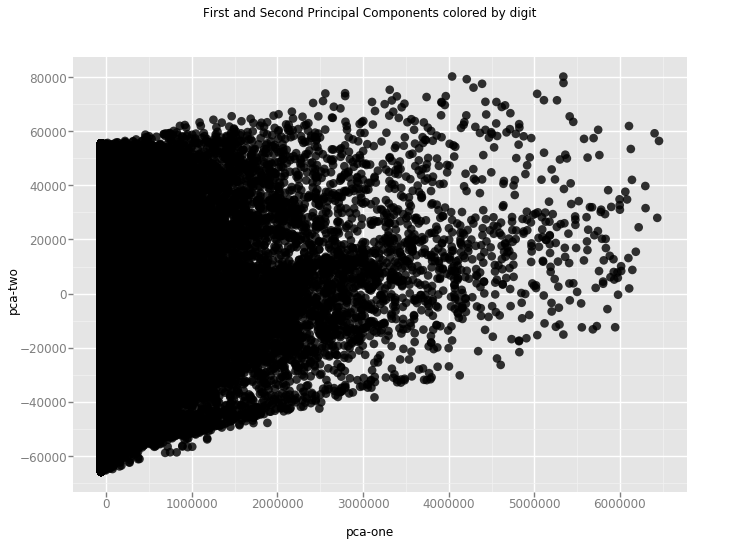

<ggplot: (-9223371841967849121)>

In [10]:
import time
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt
start_time = time.time()

df = pd.DataFrame()
df['pca-one'] = data1[:,0]
df['pca-two'] = data1[:,1] 
df['UserId'] = data['UserId']

chart = ggplot( df, aes(x='pca-one', y='pca-two') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
print("--- %s seconds ---" % (time.time() - start_time))
chart

In [12]:
from sklearn.cluster import KMeans
start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=0).fit(data[col])
print(kmeans.labels_)
print("--- %s seconds ---" % (time.time() - start_time))

[3 0 0 ... 0 0 0]
--- 121.61495637893677 seconds ---


In [13]:
kmeans.cluster_centers_

array([[1.10748282e+02, 6.61112026e-01, 2.33220296e+02, 2.54975972e+02,
        2.48425839e+02, 2.21452278e+02, 2.54741951e+02, 2.53413203e+02,
        2.54933868e+02, 2.52438456e+02, 2.25375561e+02, 2.54893099e+02,
        2.54914833e+02, 2.52327254e+02, 2.53602619e+02, 2.53280921e+02,
        1.55479386e+02, 2.52416097e+02, 2.54775301e+02, 2.54987439e+02,
        2.51821864e+02, 2.53671706e+02, 2.53031435e+02, 2.51179473e+02,
        2.54973845e+02, 2.54303481e+02, 2.53894637e+02, 2.54842392e+02,
        2.36240858e+02, 2.53411275e+02, 2.52883799e+02, 2.45087659e+02,
        2.52974634e+02, 2.54841654e+02, 2.54341816e+02, 2.49541458e+02,
        2.53698249e+02, 2.54998286e+02, 2.53103256e+02, 2.46013071e+02,
        2.54589891e+02, 2.26341114e+02, 2.54252868e+02, 2.54901065e+02,
        2.42886377e+02, 2.44195842e+02, 2.53549794e+02, 2.54866765e+02,
        2.52892767e+02, 2.49762054e+02, 2.54541668e+02, 2.54890654e+02,
        2.45859365e+02, 2.54998281e+02, 2.54870821e+02, 2.544621

In [16]:
start_time = time.time()
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(data[col])
print(kmeans5.labels_)
print("--- %s seconds ---" % (time.time() - start_time))

[3 0 0 ... 0 0 0]
--- 201.56218242645264 seconds ---


In [17]:
start_time = time.time()
kmeans6 = KMeans(n_clusters=6, random_state=0).fit(data[col])
print(kmeans6.labels_)
print("--- %s seconds ---" % (time.time() - start_time))

[5 0 5 ... 0 0 0]
--- 209.80640530586243 seconds ---


In [18]:
start_time = time.time()
kmeans7 = KMeans(n_clusters=7, random_state=0).fit(data[col])
print(kmeans7.labels_)
print("--- %s seconds ---" % (time.time() - start_time))

[6 0 6 ... 0 0 0]
--- 333.23901653289795 seconds ---


In [19]:
start_time = time.time()
kmeans8 = KMeans(n_clusters=8, random_state=0).fit(data[col])
print(kmeans8.labels_)
print("--- %s seconds ---" % (time.time() - start_time))

[5 7 5 ... 7 0 7]
--- 286.2024037837982 seconds ---


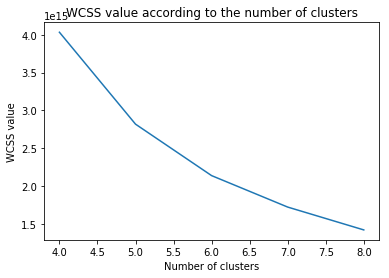

--- 1377.7480416297913 seconds ---


In [22]:
start_time = time.time()

dist = []
for i in range(4,9):

    # Initialize KMeans algorithm
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    # Fit on data
    km.fit(data[col])
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

# Initialize figure
fig = plt.figure()

# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(4,9), dist)
plt.title('WCSS value according to the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [23]:
print("Optimum Number of Clusters: 6")

Optimum Number of Clusters: 6


In [24]:
kmeans6.cluster_centers_

array([[1.10947027e+02, 6.60213579e-01, 2.33339737e+02, 2.54976336e+02,
        2.48402186e+02, 2.21474392e+02, 2.54738511e+02, 2.53421953e+02,
        2.54935740e+02, 2.52411983e+02, 2.25371112e+02, 2.54894759e+02,
        2.54916667e+02, 2.52327475e+02, 2.53594162e+02, 2.53262135e+02,
        1.56047632e+02, 2.52390329e+02, 2.54771807e+02, 2.54987012e+02,
        2.51814845e+02, 2.53665568e+02, 2.53022997e+02, 2.51163893e+02,
        2.54975312e+02, 2.54301705e+02, 2.53890176e+02, 2.54838218e+02,
        2.36404686e+02, 2.53373848e+02, 2.52878082e+02, 2.45013515e+02,
        2.52953674e+02, 2.54836868e+02, 2.54351928e+02, 2.49523416e+02,
        2.53716629e+02, 2.54998228e+02, 2.53138148e+02, 2.45935140e+02,
        2.54580097e+02, 2.26156910e+02, 2.54239305e+02, 2.54903029e+02,
        2.42878833e+02, 2.44219676e+02, 2.53538885e+02, 2.54866381e+02,
        2.52861320e+02, 2.49799497e+02, 2.54540299e+02, 2.54891678e+02,
        2.45883742e+02, 2.54998223e+02, 2.54871169e+02, 2.544592

In [30]:
start_time = time.time()
kmeans = KMeans(n_clusters=6, random_state=0).fit(data1)
print(kmeans.labels_)
print("--- %s seconds ---" % (time.time() - start_time))

[3 0 3 ... 0 0 0]
--- 31.6540949344635 seconds ---


In [48]:
y = kmeans.predict(data1).astype(int)
len(y)

466124

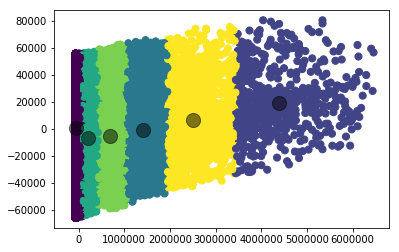

In [34]:
plt.scatter(data1[:, 0], data1[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.show()

In [46]:
data1['Category'] = pd.DataFrame(y.tolist())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

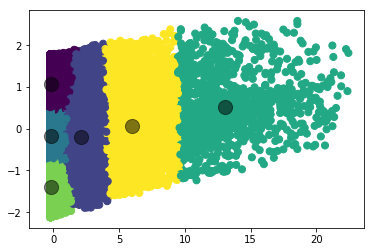

In [52]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data2)
y = kmeans.predict(data2).astype(int)

plt.scatter(data2[:, 0], data2[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

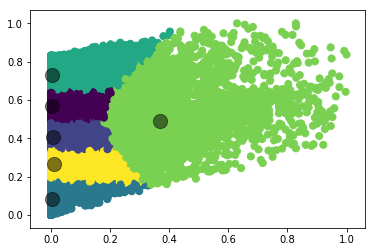

In [54]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data2)
y = kmeans.predict(data2).astype(int)

plt.scatter(data2[:, 0], data2[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.show()